In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
url = "survey lung cancer.csv"
data = pd.read_csv(url)
data


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [27]:
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0}).fillna (-1)
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.97


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



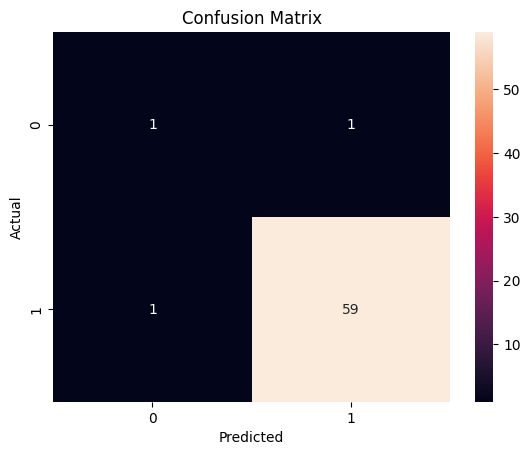

In [31]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
import numpy as np
x = int(input("GENDER (0 for Female, 1 for Male): "))
y = int(input("AGE: "))
z = int(input("SMOKING (0 for No, 1 for Yes): "))
a = int(input("YELLOW FINGERS (0 for No, 1 for Yes): "))
b = int(input("ANXIETY (0 for No, 1 for Yes): "))
c = int(input("PEER PRESSURE (0 for No, 1 for Yes): "))
d = int(input("CHRONIC DISEASE (0 for No, 1 for Yes): "))
e = int(input("FATIGUE (0 for No, 1 for Yes): "))
f = int(input("ALLERGY (0 for No, 1 for Yes): "))
g = int(input("ALCOHOL CONSUMING (0 for No, 1 for Yes): "))
i = int(input("COUGHING (0 for No, 1 for Yes): "))
j = int(input("SHORTNESS OF BREATH (0 for No, 1 for Yes): "))
k = int(input("SWALLOWING DIFFICULTY (0 for No, 1 for Yes): "))
l = int(input("CHEST PAIN (0 for No, 1 for Yes): "))





GENDER (0 for Female, 1 for Male): 1
AGE: 65
SMOKING (0 for No, 1 for Yes): 0
YELLOW FINGERS (0 for No, 1 for Yes): 1
ANXIETY (0 for No, 1 for Yes): 1
PEER PRESSURE (0 for No, 1 for Yes): 0
CHRONIC DISEASE (0 for No, 1 for Yes): 0
FATIGUE (0 for No, 1 for Yes): 0
ALLERGY (0 for No, 1 for Yes): 0
ALCOHOL CONSUMING (0 for No, 1 for Yes): 0
COUGHING (0 for No, 1 for Yes): 1
SHORTNESS OF BREATH (0 for No, 1 for Yes): 0
SWALLOWING DIFFICULTY (0 for No, 1 for Yes): 1
CHEST PAIN (0 for No, 1 for Yes): 0


In [47]:
sample_data = pd.DataFrame([[x,y,z,a,b,c,d,e,f,g,h,i,j,k,l]],
                           columns=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                    'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                                    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                                    'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
sample_data_scaled = scaler.transform(sample_data)
prediction = model.predict(sample_data_scaled)
prediction_result = "Lung Cancer" if prediction[0] == 1 else "No Lung Cancer"
print("Prediction:", prediction_result)

Prediction: No Lung Cancer
